# Part I - ( Ford GoBike System Data Exploration)

## Par (N'da kouassi jean jaures mickael)

## Preliminary Wrangling

>cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.


In [306]:
# importer tous les packages et définir les tracés à intégrer en ligne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [307]:
# charger l'ensemble de données dans une base de données data_bike
data_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [308]:
# aperçu de haut niveau de la forme et de la composition des données
print(data_bike.shape)
print(data_bike.dtypes)
print(data_bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [309]:
# statistiques descriptives pour les variables numériques
print(data_bike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [310]:
# vérifier les doublons
data_bike.duplicated().sum()

0

In [311]:
# vérifier le pourcentage de valeurs manquantes
(data_bike.isnull().sum()/data_bike.isnull().count())*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

### Quelle est la structure de votre jeu de données ?

> Il y a 183.412 trajets effectués dans l'ensemble de données avec 16 caractéristiques (`'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'`). La plupart des variables sont de nature numérique tandis que certaines variables comme `start_time` et `end_time` ont les mauvais types de données au lieu de la date/heure.

> De plus, les variables `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` et `member_gender` contenaient des valeurs manquantes avec les pourcentages suivants :

>`start_station_id`: 0.107 <br>
`start_station_name` : 0.107 <br>
`end_station_id` : 0.107 <br>
`end_station_name` : 0.107 <br>
`année_naissance_membre` : 4.506 <br>
`member_gender` : 4.506 <br>

### Quelle(s) est/sont la/les principale(s) caractéristique(s) d'intérêt dans votre jeu de données ?

> Parmi plusieurs autres informations qui justifieraient une enquête tout au long de l'exploration des données, je suis plus intéressé à déterminer :
1. L'heure de la journée, le jour de la semaine où la plupart des trajets sont effectués
2. Combien de temps dure le trajet moyen ?
3. Si la réponse aux points 1 et 2 ci-dessus dépend du fait qu'un utilisateur soit un abonné ou un client ?

> Les principales caractéristiques intéressantes seraient `duration_sec`, `start_time` et `user_type`.

### À votre avis, quelles fonctionnalités de l'ensemble de données vous aideront à étayer votre enquête sur les fonctionnalités qui vous intéressent ?

> Avec l'ingénierie des fonctionnalités supplémentaires à partir des principales fonctionnalités d'intérêt, je pense que l'extraction de l'heure du jour et du jour de la semaine à partir de start_time aidera à répondre à l'objectif numéro 1 répertorié ci-dessus. On pourrait également s'attendre à ce que duration_sec puisse aider à répondre à l'objectif numéro 2, puis à user_type avec l'objectif numéro 3. De plus, des fonctionnalités telles que `member_birth_year` et `member_gender` aideraient grandement à soutenir mes recherches.

In [312]:
# faire une copie du jeu de données d'origine à nettoyer
data_bike_new = data_bike.copy()

In [313]:
# supprimer les variables qui ne sont pas pertinentes pour notre analyse
data_bike_new.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude', 'bike_id', 
        'bike_share_for_all_trip'], axis=1, inplace=True)
data_bike_new.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male


In [314]:
# assigner les types de données appropriés au start_time(date)
data_bike_new['start_time'] = pd.to_datetime(data_bike_new['start_time'])

In [315]:
# assigner les types de données appropriés au start_time(date)
data_bike_new['end_time'] = pd.to_datetime(data_bike_new['end_time'])

In [316]:
# extrait du jour de la semaine
data_bike_new['day_of_week'] = data_bike_new['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Lundi',1:'Mardi',2:'Mercredi',3:'Jeudi',4:'Vendredi',5:'Samedi',6:'Dimanche'}
data_bike_new['day_of_week'] = data_bike_new['day_of_week'].map(dmap)
# extraire l'heure de la journée
data_bike_new['start_hour'] = data_bike_new['start_time'].apply(lambda time: time.hour)
data_bike_new['time_of_day'] = 'Matin'
data_bike_new['time_of_day'][(data_bike_new['start_hour'] >= 12) & (data_bike_new['start_hour'] <= 17)] = 'Après midi'
data_bike_new['time_of_day'][(data_bike_new['start_hour'] >= 18) & (data_bike_new['start_hour'] <= 23)] = 'Nuit'

# afficher les colonnes ajoutées
display(data_bike_new[['day_of_week','start_hour','time_of_day']])

,day_of_week,start_hour,time_of_day
0,Jeudi,17,Après midi
1,Jeudi,18,Nuit
2,Jeudi,12,Après midi
3,Jeudi,17,Après midi
4,Jeudi,23,Nuit
...,...,...,...
183407,Vendredi,0,Matin
183408,Vendredi,0,Matin
183409,Vendredi,0,Matin
183410,Vendredi,0,Matin


In [317]:
# afficher le dataframe
display(data_bike_new.head())

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,Jeudi,17,Après midi
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,Jeudi,18,Nuit
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,Jeudi,12,Après midi
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,Jeudi,17,Après midi
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Jeudi,23,Nuit


## Univariate Exploration


> Dans cette section, étudiez les distributions des variables individuelles. Si
vous voyez des points inhabituels ou des valeurs aberrantes, regardez de plus près pour nettoyer les choses
et préparez-vous à examiner les relations entre les variables.

Je vais commencer par regarder la distribution des principales variables d'intérêt : `day_of_week`, `time_of_day`, `user_type` et `duration_sec`

Jeudi       35197
Mardi       31813
Mercredi    29641
Vendredi    28981
Lundi       26852
Dimanche    15523
Samedi      15405
Name: day_of_week, dtype: int64

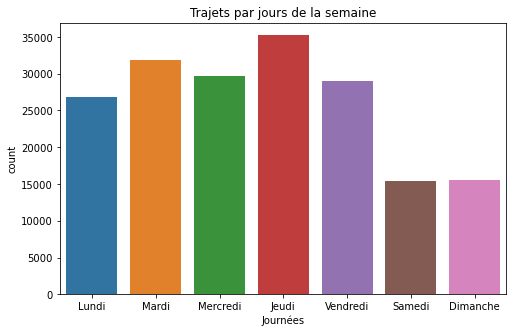

In [318]:
# Obtenez le nombre de trajets effectués chaque jour de la semaine
display(data_bike_new['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
# distribution du tracé du jour de la semaine
plt.figure(figsize=[8, 5])

sns.countplot(data = data_bike_new, x = 'day_of_week', order=weekday)
plt.title('Trajets par jours de la semaine')
plt.xlabel('Journées')
plt.show()

Il se trouve que le jour de la semaine avec le plus de trajets est le **jeudi** suivi du mardi et du mercredi. On peut voir que le samedi et le dimanche ont le moins de trajets, ce qui est tout à fait raisonnable compte tenu du fait qu'il ne s'agit pas de jours ouvrables. Par conséquent, j'étudierais comment le type d'utilisateur et le sexe sont répartis entre les jours de la semaine.

Le pourcentage de trajets effectués en termes d'heures de la journée (%)
Après midi    38.51
Matin         38.42
Nuit          23.07
Name: time_of_day, dtype: float64


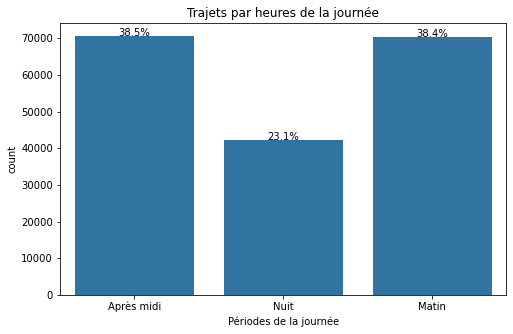

In [319]:
# Obtenez le pourcentage de trajets effectués en termes d'heures de la journée
time_of_day_count = (data_bike_new['time_of_day'].value_counts()/data_bike_new['time_of_day'].count())*100
print("Le pourcentage de trajets effectués en termes d'heures de la journée (%)")
print(time_of_day_count.round(2).sort_values(ascending=False))

# distribution du tracé du jour de la semaine
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = data_bike_new, x = 'time_of_day', color = base_color)
n_points = data_bike_new.shape[0]
user_counts = data_bike_new['time_of_day'].value_counts()
locs, labels = plt.xticks()

# fréquence d'impression sur le graphique à barres
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trajets par heures de la journée')
plt.xlabel('Périodes de la journée')
plt.show();

Il ressort du tracé que l'heure de la journée avec le plus de déplacements est **Après-midi** (12h00 - 17h59 du jour) suivi du Matin (00h00 - 11h59 du journée). Cependant, les différences entre le nombre de trajets effectués dans les deux temps sont très faibles. C'est vraiment raisonnable. Personne ne s'attend à autant de trajets la nuit. Une analyse plus approfondie sera effectuée pour voir si cela est probablement influencé par les types d'utilisateurs (abonné et client)

Types d'utilisateurs Pourcentage Nombre (%)


Subscriber    89.17
Customer      10.83
Name: user_type, dtype: float64


Membres Sexe Pourcentage Nombre (%)


Male      74.60
Female    23.32
Other      2.09
Name: member_gender, dtype: float64

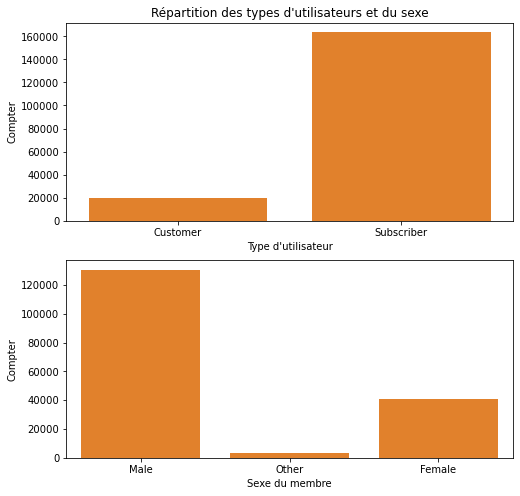

In [320]:
# Obtenez le pourcentage de types d'utilisateurs et de sexe
user_type_count = (data_bike_new['user_type'].value_counts()/data_bike_new['user_type'].count())*100
member_gender_count = (data_bike_new['member_gender'].value_counts()/data_bike_new['member_gender'].count())*100

print("Types d'utilisateurs Pourcentage Nombre (%)")
display(user_type_count.round(2).sort_values(ascending=False))
print("\nMembres Sexe Pourcentage Nombre (%)")
display(member_gender_count.round(2).sort_values(ascending=False))

# Attributs des Riders : les répartitions par type d'utilisateur et par sexe
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette()[1]
sns.countplot(data = data_bike_new, x = 'user_type', color = default_color, ax = ax[0])
sns.countplot(data = data_bike_new, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel("Type d'utilisateur")
ax[0].set_ylabel('Compter')
ax[1].set_xlabel('Sexe du membre')
ax[1].set_ylabel('Compter')
ax[0].set_title("Répartition des types d'utilisateurs et du sexe");

- Comme on pouvait s'y attendre dans la plupart des cas, la plupart des trajets (environ 90 %) sont effectués par les **abonnés**, les 10 % restants étant uniquement des passagers occasionnels. Dans le cas d'un plus grand pourcentage de voyages par des abonnés ; qui ne voudrait pas utiliser efficacement son abonnement ?. Ou d'un autre point de vue, les abonnés pourraient utiliser les vélos pour les trajets quotidiens tandis que les clients ne les utilisent que pour des activités de loisirs.



- De plus, près de 75 % des passagers qui ont fait des voyages sont des **hommes**, soit 3 fois plus que les femmes, les 2 % restants étant considérés comme autres.

Passons maintenant aux dernières principales variables d'intérêt : duration_sec

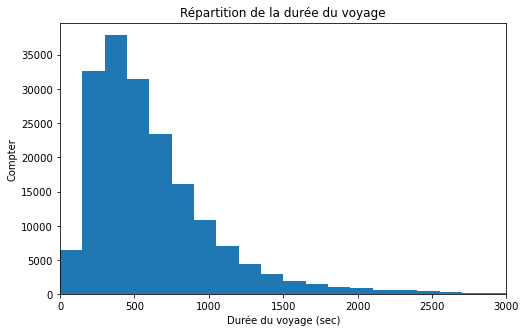

In [321]:
# commencer avec un tracé à l'échelle standard
binsize = 150
bins = np.arange(0, data_bike_new['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = data_bike_new, x = 'duration_sec', bins=bins)
plt.xlim(0, 3000)
plt.xlabel('Durée du voyage (sec)')
plt.ylabel('Compter')
plt.title('Répartition de la durée du voyage')
plt.show()

La distribution de la durée du voyage en secondes est très asymétrique à droite avec une très longue queue qu'il était très difficile de visualiser. J'ai dû résoudre en binning de taille 150 et également définir la limite de l'axe x de l'intrigue à 3000. Je vais changer la variable de durée du voyage en minute au lieu de seconde et aussi savoir combien de temps dure le voyage moyen.

In [322]:
# normaliser la variable de durée du trajet en minutes
data_bike_new['duration_min'] = data_bike_new['duration_sec'] / 60
# supprimer la colonne 'duration_sec"
data_bike_new.drop('duration_sec' , axis = 1 , inplace = True)

# Afficher
display(data_bike_new[['duration_min']])

,duration_min
0,869.750000
1,708.683333
2,1030.900000
3,608.166667
4,26.416667
...,...
183407,8.000000
183408,5.216667
183409,2.350000
183410,2.316667


La durée du trajet moyen effectué est de 12.1 minutes.


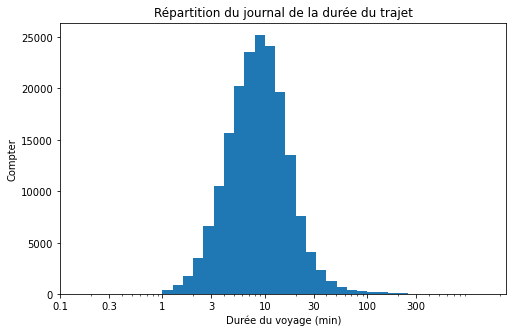

In [323]:
# imprimer la durée moyenne du trajet
average_trip_duration = np.round(data_bike_new['duration_min'].mean(),2)
print("La durée du trajet moyen effectué est de %s minutes."%(average_trip_duration))

# distribution de la durée du trajet en échelle logarithmique
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(data_bike_new['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = data_bike_new, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Durée du voyage (min)')
plt.ylabel('Compter')
plt.title('Répartition du journal de la durée du trajet')
plt.show()

Lorsque la durée du trajet est convertie en minutes et tracée sur une échelle logarithmique, la distribution de la durée semble très unimodale, avec un pic autour de 10 minutes. Fait intéressant, la durée moyenne du trajet est d'environ 12 minutes.

Je vais maintenant examiner les autres fonctionnalités des données pour voir si l'une d'entre elles possède des propriétés intéressantes : `start_hour`

Le pourcentage du nombre d'heures de début de trajet (%)


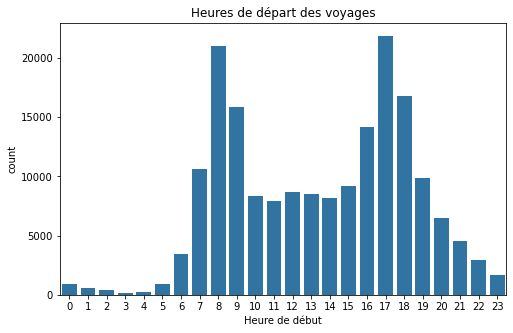

In [324]:
# Obtenez le pourcentage de trajets effectués en termes d'heures de la journée
start_hour_count = (data_bike_new['start_hour'].value_counts()/data_bike_new['start_hour'].count())*100
print("Le pourcentage du nombre d'heures de début de trajet (%)")

# distribution du tracé du jour de la semaine
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = data_bike_new, x = 'start_hour', color = base_color)
plt.title('Heures de départ des voyages')
plt.xlabel('Heure de début')
plt.show();

D'après l'histogramme ci-dessus, on peut voir que les trajets commencent principalement entre 8h-9h et 17h-18h (17-18). Ceci est tout à fait justifiable car ces heures correspondent respectivement aux heures que les gens quittent pour le travail et le domicile.

Avant de fermer cette section, je vais jeter un œil à la répartition par âge des coureurs

In [325]:
# créer la colonne d'âge en prenant l'année 2019 comme année en cours
data_bike_new['user_age'] = data_bike_new['member_birth_year'].apply(lambda x: 2019 - x)
# supprimer la colonne "member_birth_year"
data_bike_new.drop('member_birth_year' , axis = 1 , inplace = True)
# test
display(data_bike_new[['user_age']].head())

,user_age
0,35.0
1,NaN
2,47.0
3,30.0
4,45.0


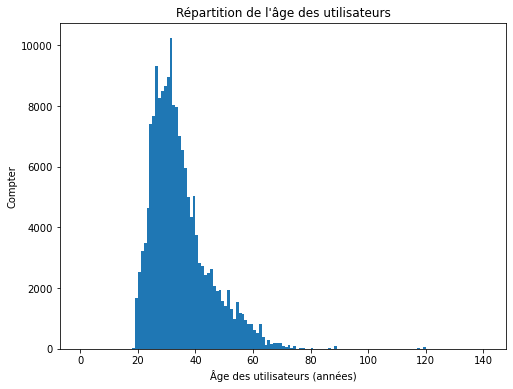

In [326]:
# commencer avec un tracé à l'échelle standard
binsize = 1
bins = np.arange(0, data_bike_new['user_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = data_bike_new, x = 'user_age', bins=bins)
plt.xlabel('Âge des utilisateurs (années)')
plt.ylabel('Compter')
plt.title("Répartition de l'âge des utilisateurs")
plt.show()

La répartition par âge des utilisateurs est fortement asymétrique à droite avec également une queue assez longue. c'est-à-dire que la plupart des utilisateurs ont entre 18 et 60 ans, alors qu'il existe des âges étonnamment âgés allant de 80 à 140 ans. Il peut y avoir eu une erreur dans la saisie des données ou il peut simplement s'agir d'une exception dans les attentes générales.
Pour avoir une meilleure compréhension de la distribution, je classerais les âges en groupes pour voir comment les tranches d'âge sont distribuées.

In [327]:
# créer une nouvelle colonne user_age_bin à partir du groupe user_age
max_age = str(int(data_bike_new.user_age.max()))
data_bike_new['user_age_bin'] = data_bike_new['user_age'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

# test
display(data_bike_new[['user_age_bin']].head())

,user_age_bin
0,31 - 40
1,NaN
2,41 - 50
3,21 - 30
4,41 - 50


In [328]:
data_bike_new.user_age_bin.value_counts()

21 - 30     70115
31 - 40     63886
41 - 50     22050
51 - 60     11326
10 - 20      4240
61 - 70      2955
71 - 80       383
81 - 141      192
Name: user_age_bin, dtype: int64

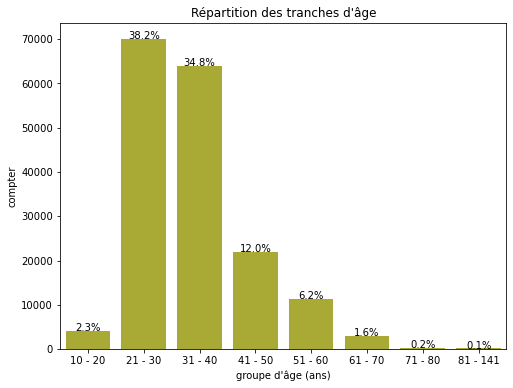

In [329]:
# distribution du tracé du jour de la semaine
plt.figure(figsize=[8, 6])
base_color = sns.color_palette()[8]
sns.countplot(data = data_bike_new.sort_values(['user_age_bin']), x = 'user_age_bin', color = base_color)
n_points = data_bike_new.shape[0]
user_counts = data_bike_new['user_age_bin'].value_counts()
locs, labels = plt.xticks()

# fréquence d'impression sur le graphique à barres
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title("Répartition des tranches d'âge")
plt.xlabel("groupe d'âge (ans)")
plt.ylabel("compter")
plt.show()

### Discutez de la ou des distributions de vos variables d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?

> Les variables `duration_sec` et `user_age` (obtenues en soustrayant `member_birth_year` de l'année où les données ont été enregistrées - 2019) semblent très asymétriques. Pour traiter le duration_sec, j'avais besoin de convertir la durée de seconde en minute, puis d'utiliser une transformation logarithmique qui rendait ensuite la distribution résultante légèrement unimodale avec un pic d'environ 10 minutes alors que la moyenne de la distribution était d'environ 12 minutes.
Pour la transformation de l'âge, puisque les valeurs aberrantes supposées dans la répartition par âge sont réalisées comme étant des années valides. J'ai pu regrouper les âges, ce qui a abouti à une distribution avec moins d'asymétrie.

>J'ai également vérifié des variables comme `user_type`, `member_genders` et tant d'autres variables dérivées qui sont essentielles pour comprendre l'ensemble de données et communiquer les résultats des données. Ce qui suit résume mes conclusions en général :

 * Le jour de la semaine avec le plus de déplacements est le jeudi suivi du mardi et du mercredi. La plupart des gens font des trajets en semaine du lundi au vendredi par rapport aux week-ends
 * L'heure de la journée avec le plus de trajets est l'après-midi (12h00 - 17h59 du jour) suivi du matin (00h00 - 11h59 du jour)
 * La plupart des trajets (environ 90 %) sont effectués par les abonnés et aimeraient étudier plus avant si cela influence également la durée du trajet
 * Près de 75 % des coureurs qui ont fait des voyages sont des hommes, soit 3 fois plus que les femmes.
 * Les voyages commencent principalement entre 8h-9h et 17h-18h (17-18)
 * Pas moins de 70 % des passagers ont entre 21 et 40 ans, une population assez jeune, mais cela pourrait-il être lié à une durée de trajet plus longue ?


### Parmi les fonctionnalités que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela ?

> La répartition par âge semblait inhabituelle, des âges très avancés sont présents qui semblaient être des valeurs aberrantes mais j'ai pensé qu'il était juste de laisser faire car ils sont valides. Les types de données des variables liées à la date ont également été remplacés par les types appropriés.
De plus, une ingénierie des fonctionnalités a été effectuée pour créer des fonctionnalités critiques et importantes pour mon analyse. C'est cette ingénierie des fonctionnalités qui a donné naissance à des fonctionnalités telles que `'day_of_week', 'start_hour', 'time_of_day', 'duration_min', 'user_age'` et `'user_age_bin'`.
J'ai également supprimé des variables qui ne présentent pas d'intérêt dans l'ensemble de données pour ranger l'ensemble de données pour l'exploration.

## Bivariate Exploration

**Pour commencer, je souhaite examiner les corrélations par paires présentes entre les caractéristiques dans les données.**

In [330]:
numeric_vars = ['start_hour', 'duration_min', 'user_age' ]
categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day']

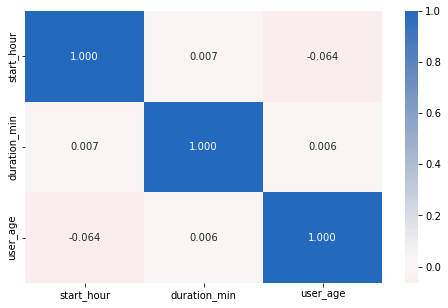

In [331]:
# graphique de corrélation
plt.figure(figsize = [8, 5])
sns.heatmap(data_bike_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

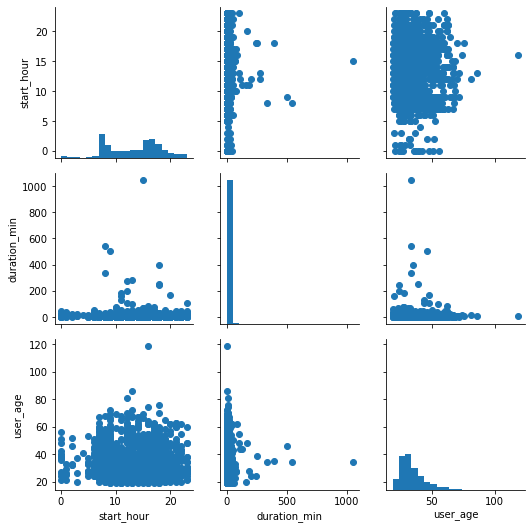

In [332]:
# matrice de tracé : échantillon de 2000 trajets pour que les tracés soient plus clairs et
# ils rendent plus vite
samples = np.random.choice(data_bike_new.shape[0], 2000, replace = False)
df_new_samp = data_bike_new.loc[samples,:]

g = sns.PairGrid(data = df_new_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Comme on peut le voir sur les graphiques, 'start_hour', 'duration_min' et 'user_age' ne sont en aucun cas corrélés entre eux. Cependant, une corrélation légèrement négative a été trouvée entre l'âge de l'utilisateur et la durée du voyage. J'étudierais plus avant si les groupes d'âge (âge regroupé) auraient une relation avec la durée du voyage.

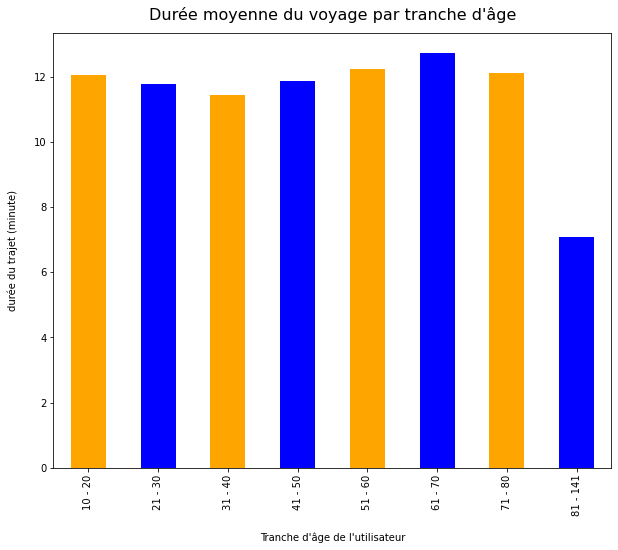

In [333]:
new_color=['orange', 'blue']
data_bike_new.groupby('user_age_bin')['duration_min'].mean().plot(kind='bar', color=new_color, figsize=(10,8))
plt.title("Durée moyenne du voyage par tranche d'âge", fontsize=16, y=1.015)
plt.xlabel("Tranche d'âge de l'utilisateur", labelpad=16)
plt.ylabel('durée du trajet (minute)', labelpad=16);

Je m'attendais à ce que les groupes d'âge jeunes aient la durée moyenne de trajet la plus élevée en raison de la force et de l'agilité qu'ils posséderaient, mais le graphique ci-dessus m'a prouvé le contraire. Cela pourrait être aggravé par le fait que la durée des trajets n'est pas basée sur la force et l'agilité de l'utilisateur. Il serait cependant préférable et juste de dire que la durée du trajet n'est pas affectée par l'âge de l'utilisateur, sans tenir compte des tranches d'âge extrêmes (81-141).

<Figure size 720x720 with 0 Axes>

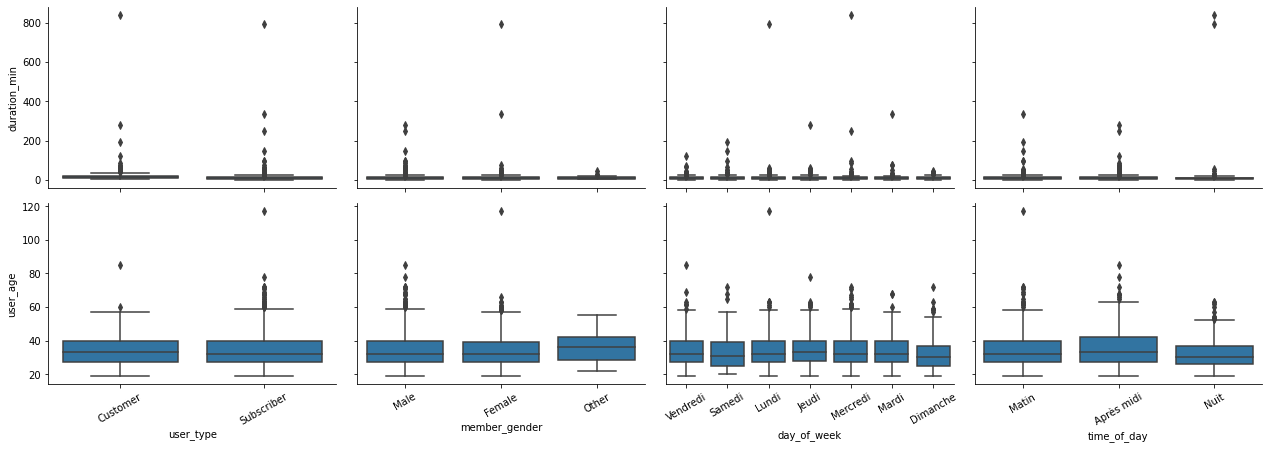

In [334]:
# tracer la matrice des caractéristiques numériques par rapport aux caractéristiques catégorielles.
# peut utiliser un échantillon plus grand puisqu'il y a moins de parcelles et qu'elles sont de nature plus simple.

samples = np.random.choice(data_bike_new.shape[0], 2000, replace = False)
df_new_samp = data_bike_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Astuce rapide pour créer des boîtes à moustaches avec PairGrid de Seaborn. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 30)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_new_samp, y_vars = ['duration_min', 'user_age'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Il semble qu'il existe une relation entre la variable type d'usager et la variable durée du trajet. Le type d'utilisateur client semble passer plus de temps sur un voyage par rapport à l'homologue abonné. Aucune autre corrélation tangible n'a pu être observée à partir de l'un des graphiques ci-dessus. Et avec cet aperçu préliminaire des relations bivariées, je veux approfondir certaines des relations. Je veux voir comment le jour de la semaine, l'heure de la journée et la durée moyenne du trajet sont liés aux user_types.

#### Le jour de la semaine où la plupart des trajets sont effectués dépend-il du fait qu'un utilisateur soit un abonné ou un client ?

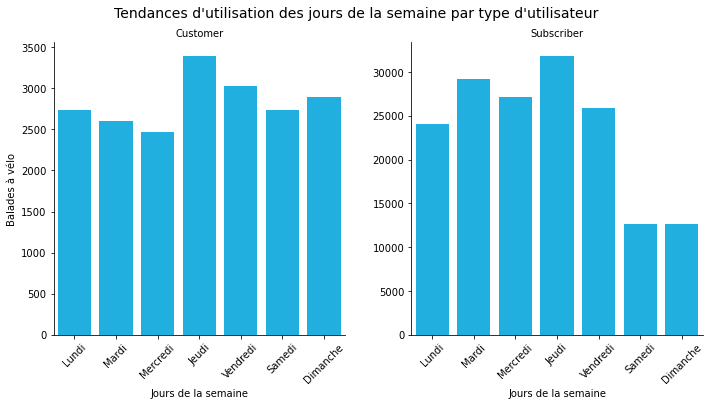

In [335]:
g = sns.catplot(data=data_bike_new, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Jours de la semaine", "Balades à vélo")
g.set_titles("{col_name}")
g.fig.suptitle("Tendances d'utilisation des jours de la semaine par type d'utilisateur", y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

D'après le graphique à barres ci-dessus, le jour de la semaine où la plupart des trajets sont effectués (jeudi) ne dépend PAS du fait qu'un utilisateur soit un abonné ou un client. D'après les graphiques à barres, les tendances montrent que les clients utilisent souvent le service pendant les week-ends alors que les abonnés utilisent principalement le service pendant les jours de semaine réguliers du lundi au vendredi. Nous pourrions en déduire que les abonnés utilisent régulièrement les vélos pour le travail et les déplacements domicile-travail et que les clients l'utilisent pour des activités récréatives pendant les week-ends.

#### L'heure de la journée à laquelle la plupart des trajets sont effectués dépend-elle du fait qu'un utilisateur soit un abonné ou un client ?

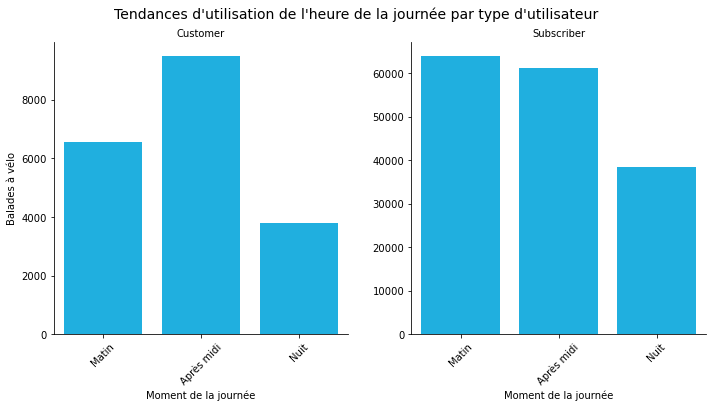

In [336]:
day_time = ['Matin', 'Après midi', 'Nuit']
g = sns.catplot(data=data_bike_new, x='time_of_day', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = day_time)
g.set_axis_labels("Moment de la journée", "Balades à vélo")
g.set_titles("{col_name}")
g.fig.suptitle("Tendances d'utilisation de l'heure de la journée par type d'utilisateur", y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

D'après le graphique à barres ci-dessus, l'heure de la journée à laquelle la plupart des trajets sont effectués (après-midi et matin) dépend légèrement du fait qu'un utilisateur soit un abonné ou un client. D'après les graphiques à barres, les tendances montrent que les clients commencent souvent le voyage l'après-midi alors que les abonnés commencent le voyage le plus souvent le matin. Cela a en outre prouvé que les abonnés pouvaient utiliser les vélos pour se rendre au travail et à la maison et que les clients les utilisaient pour des activités récréatives.

#### La durée moyenne du trajet effectué dépend-elle du fait qu'un utilisateur est un abonné ou un client ?

,user_type,duration_min
0,Customer,23.874417
1,Subscriber,10.671061


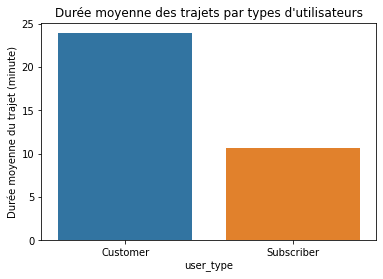

In [337]:
# Tracé moyen de la durée moyenne du trajet
grouped_user_type_duration = data_bike_new[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
# afficher l'analyse
display(grouped_user_type_duration)

sns.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Durée moyenne des trajets par types d'utilisateurs")
plt.ylabel("Durée moyenne du trajet (minute)")
plt.show()

Text(0.5, 1.0, "Durée par type d'utilisateur")

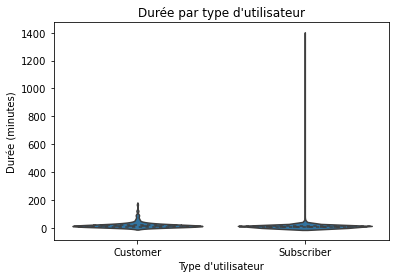

In [338]:
# tracer la relation entre le type d'utilisateur et la durée
samples = np.random.choice(data_bike_new.shape[0], 1834, replace = False)
df_new_samp = data_bike_new.loc[samples,:]
base_color = sns.color_palette()[0]
sns.violinplot(data=df_new_samp, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel("Type d'utilisateur")
plt.ylabel('Durée (minutes)')
plt.title("Durée par type d'utilisateur")

Les utilisateurs abonnés ont tendance à faire du vélo moins longtemps que les utilisateurs clients. Cela peut être dû au fait que les utilisateurs abonnés roulent à vélo pour des trajets réguliers - travail et école, mais les utilisateurs clients peuvent être des touristes qui utilisent les vélos pour se déplacer en ville. La durée moyenne du trajet dépend fortement du fait qu'un utilisateur soit un abonné ou simplement un client. Les clients ont deux fois la durée du voyage des abonnés.
Étant donné que les clients partent principalement en voyage le week-end, on pourrait s'attendre à ce que la durée moyenne du voyage soit alors la plus élevée le week-end. Cela serait vérifié plus loin pour confirmation.

Durée moyenne du trajet basée sur le jour de la semaine :

,day_of_week,duration_min
0,Dimanche,15.329101
1,Jeudi,11.650683
2,Lundi,11.885994
3,Mardi,11.055093
4,Mercredi,11.227853
5,Samedi,15.044367
6,Vendredi,11.596585


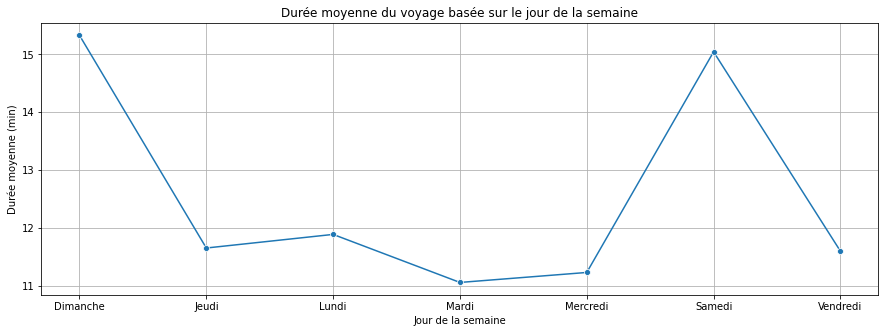

In [339]:
weekday_avg_min = data_bike_new[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[15,5])
sns.lineplot(data=weekday_avg_min, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Durée moyenne (min)');
plt.xlabel('Jour de la semaine')
plt.grid()
plt.title('Durée moyenne du voyage basée sur le jour de la semaine')
#plt.show()
weekday_avg_min

Comme prévu, les samedis et dimanches ont la plus longue durée de voyage puisque les deux jours sont majoritairement utilisés par les clients.

Relation entre les types d'utilisateurs et l'heure de début du trajet

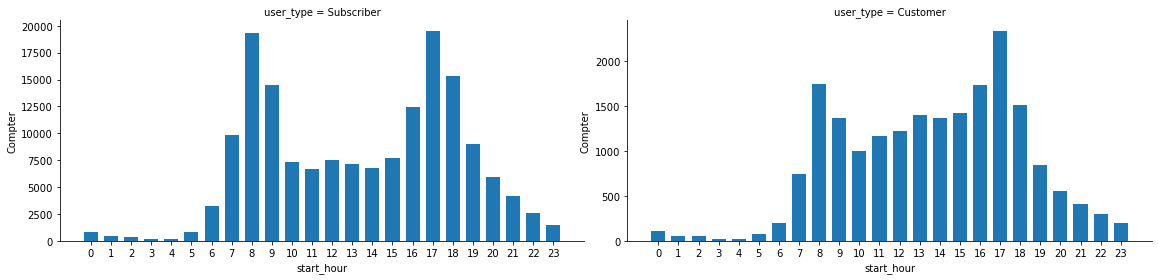

In [340]:
# histogrammes à facettes de start_hour par rapport à user_type
user_cat_order = data_bike_new['user_type'].value_counts().index
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sns.FacetGrid(data = data_bike_new, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.7)
for ax in g.axes.flat:
    ax.set_ylabel('Compter')
plt.xticks(np.arange(0, 23+1, 1));

La plupart des trajets pour les abonnés ont commencé à 8 ou 17 heure. Alors que la plupart des trajets des clients ont commencé à 17 ou 18 heure. Cela vient de confirmer que les abonnés pourraient utiliser les vélos pour les trajets quotidiens tandis que les clients uniquement pour les trajets de loisirs.

#### La durée moyenne du trajet effectué dépend-elle du fait qu'un utilisateur est un abonné ou un client ?

,member_gender,duration_min
0,Female,12.984506
1,Male,11.210651
2,Other,16.608589


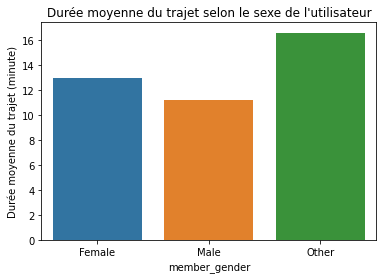

In [341]:
# Tracé moyen de la durée moyenne du trajet
grouped_gender_type_duration = data_bike_new[['member_gender','duration_min']].groupby(['member_gender'],as_index= False).mean()
# afficher l'analyse
display(grouped_gender_type_duration)

sns.barplot(x='member_gender', y='duration_min', data=grouped_gender_type_duration)
plt.title("Durée moyenne du trajet selon le sexe de l'utilisateur")
plt.ylabel("Durée moyenne du trajet (minute)")
plt.show();

Fait intéressant, même si le pourcentage le plus élevé d'utilisateurs est masculin, la femme a tendance à faire un trajet plus long que les hommes. De manière inattendue, le type « Autre » selon le sexe a la durée moyenne de déplacement la plus élevée. Je n'enquêterais pas plus avant car aucune information n'est connue sur l'autre sexe.

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques d'intérêt ont-elles varié avec d'autres caractéristiques de l'ensemble de données ?

L'utilisation des vélos par les abonnés et les clients était différente :
- Le jour de la semaine où la plupart des trajets sont effectués (jeudi) ne dépend PAS du fait qu'un utilisateur soit un abonné ou un client. Cependant, il a été découvert que les abonnés utilisaient principalement des vélos les jours ouvrables (du lundi au vendredi), tandis que l'utilisation des vélos par les clients était à peu près la même pendant toute la semaine, avec une augmentation considérable le samedi et le dimanche.
- En moyenne, les trajets des abonnés durent généralement (10-11) minutes, tandis que les clients durent généralement (23-24) minutes.
- Les trajets des clients étaient plus susceptibles de durer plus d'une heure par rapport aux abonnés.
- Les clients commencent souvent le voyage l'après-midi alors que les abonnés commencent principalement le matin suivi de l'après-midi.
- La plupart des trajets pour les abonnés ont commencé à 8 ou 17 heure. Alors que la plupart des trajets des clients ont commencé à 17 heure.

Durée moyenne du trajet en minutes :
- En moyenne, les balades du week-end (samedi et dimanche) ont duré plus longtemps que les autres jours.

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?

- Le sexe de l'utilisateur nommé "autre" avait la durée de trajet la plus élevée, suivi de la femme, l'homme ayant la durée de trajet la plus courte.

## Multivariate Exploration

Durée quotidienne moyenne du trajet pour chaque user_type

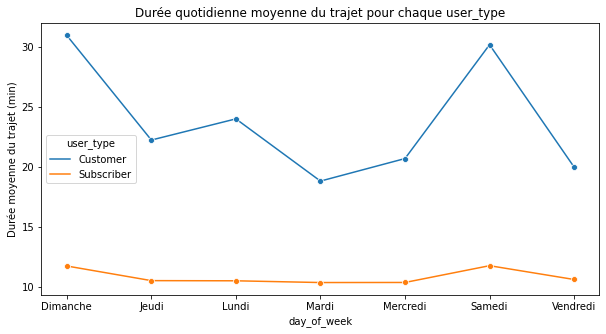

In [342]:
user_weekday_avg_min = data_bike_new.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# tracer un tracé linéaire avec des couleurs basées sur user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o')
plt.title("Durée quotidienne moyenne du trajet pour chaque user_type")
plt.ylabel('Durée moyenne du trajet (min)');

En moyenne, les trajets des clients ont duré plus longtemps que les trajets des abonnés tous les jours de la semaine.

Heure de la journée durée moyenne du trajet pour chaque user_type

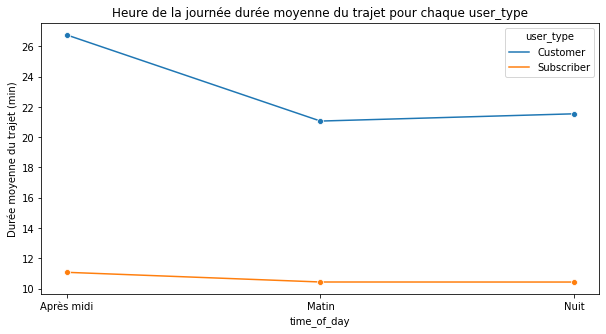

In [343]:
user_daytime_avg_min = data_bike_new.groupby(['user_type','time_of_day']).duration_min.mean()
user_daytime_avg_min = user_daytime_avg_min.reset_index()

# tracer un tracé linéaire avec des couleurs basées sur user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_daytime_avg_min, x='time_of_day', y='duration_min', hue='user_type', marker='o')
plt.title("Heure de la journée durée moyenne du trajet pour chaque user_type")
plt.ylabel('Durée moyenne du trajet (min)');

On peut voir que les parcelles ont maintenu des durées de trajet légèrement constantes pour le matin et la nuit pour les deux groupes de types d'utilisateurs alors qu'il y a une augmentation/augmentation considérable du trajet moyen pour les clients l'après-midi. En effet, les clients commencent généralement leur voyage l'après-midi.

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y a-t-il eu des fonctionnalités qui se sont renforcées en termes d'examen de vos fonctionnalités d'intérêt ?

> J'ai étendu mon enquête sur la dépendance de user_type à la durée moyenne du trajet, aux jours de la semaine et à l'heure de la journée dans cette section en examinant la relation entre les caractéristiques. L'exploration multivariée ici a montré qu'il existe effectivement une dépendance de la durée moyenne du trajet selon qu'un utilisateur est un abonné ou un client. En moyenne, les trajets des clients ont duré plus longtemps que les trajets des abonnés tous les jours de la semaine et à toutes les heures de la journée.

### Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctionnalités ?

> Non ai-je découvert. J'aurais peut-être dû explorer davantage, mais je suis satisfait des résultats jusqu'à présent.

In [344]:
# exporter le nouveau jeu de données
data_bike_new.to_csv("news-201902-fordgobike-tripdata.csv", index=False)